<a href="https://colab.research.google.com/github/ana-arcila/Evaluacion_2021-1/blob/main/Metodos_Computacionales_taller/Quiz/Entregas/Arcila_AnaMaria_6770.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd
from scipy import optimize

In [3]:
Po = 1 #presión al nivel del mar (atm)
M = 0.0288 #peso molecular del aire (kg/mol)
g = 9.8 #gravedad (m/s^2)
k = 1.3805e-23 #constante de Boltzman (J/K)
T = 254 #Temperatura de la atmosfera (K)
NA = 6.022e23 #Numero de avogadro 
ρo = 1.29 #Presion del aire al nivel del mar (kg/m^3)
λ = 7482.2 #constante (m)

Text(0, 0.5, 'Densidad(kg/m^3)')

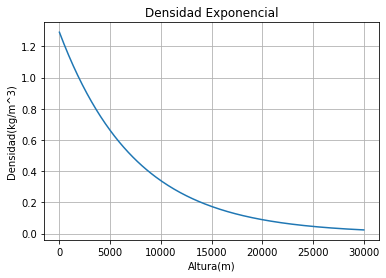

In [4]:
def ρ(y):
    """
    Funcion de la densidad, depende de la altura dada.
    """
    return ρo * np.exp(-y/λ)

#Se grafica esta densidad en varias alturas

Y = np.linspace(0, 30000, 200)

plt.plot(Y, ρ(Y))
plt.grid()
plt.title('Densidad Exponencial')
plt.xlabel('Altura(m)')
plt.ylabel('Densidad(kg/m^3)')

Hacemos las siguientes operaciones para obtener la matriz deseada:

$$y''=-mg+\frac{A\delta}{2}\rho(y) v^2$$
$$y''=-mg+\frac{A\delta}{2}\rho(y) (y')^2$$
Se hace el siguiente cambio:
$$y'=z$$
$$z'=-mg+\frac{A\delta}{2}\rho(y) z^2$$
$$
U=\begin{bmatrix}
U_0\\
U_1
\end{bmatrix}=\begin{bmatrix}
y\\
z
\end{bmatrix}.
$$
\begin{align}
\frac{\operatorname{d}}{\operatorname{d} x} 
\begin{bmatrix} 
y\\
z\\
\end{bmatrix}=&
\begin{bmatrix}
z\\
-mg+\frac{A\delta}{2}\rho(y) z^2\\
\end{bmatrix}\\
\frac{\operatorname{d}}{\operatorname{d} x} 
U=&
\begin{bmatrix}
U_1\\
-mg+\frac{A\delta}{2}\rho(U_0) U_1^2\\
\end{bmatrix}
\end{align}

In [5]:
m = 60 #masa (kg)
A = 0.3 #Area de seccion transversal expuesta al aire (m^2)
δ = 0.8 #coeficiente de forma
G = 6.67e-11 #Cinstante de gravitacion universal
M = 5.972e24 #Masa de la tierra
R = 6371e3 #Radio de la tierra (m)

def dU_dt(U, t):
    """
    Funcion para encontrar dU/dt
    """
    return [    U[1],
            -G * M/ (R + U[0]) ** 2 + 0.5 * A * δ * ρ(U[0]) * U[1] * U[1] / m]

Text(0.5, 0, 'Tiempo')

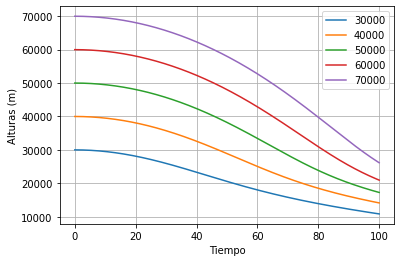

In [6]:
#Se calcula la trayectoria de el paracaidista desde cinco diferentes alturas iniciales y se grafican

Alturas = [30000, 40000, 50000, 60000, 70000]
def I(U, t):
    return integrate.odeint(dU_dt, U, t)

T = np.linspace(0, 100, 300)

for i in Alturas:
    plt.plot(T, I([i,0],T)[:,0], label = i)
    
plt.grid()
plt.legend()
plt.ylabel('Alturas (m)')
plt.xlabel('Tiempo')

In [7]:
U0_ = [30000, 0]
Ma = I(U0_, T)

Text(0, 0.5, 'Posicion')

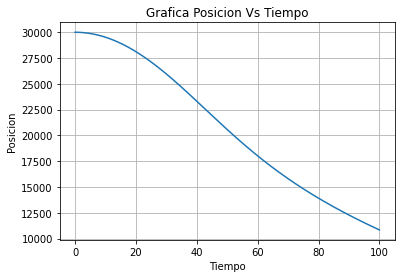

In [8]:
T = np.linspace(0, 100, 300)
plt.plot(T, Ma[:,0])
plt.grid()
plt.title('Grafica Posicion Vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Posicion')

Text(0.5, 0, 'Tiempo')

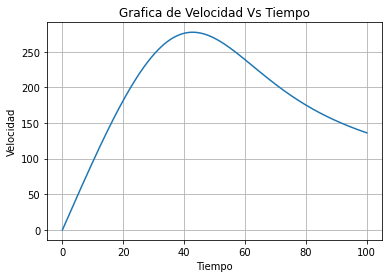

In [9]:
plt.plot(T, -Ma[:,1])
plt.grid()
plt.title('Grafica de Velocidad Vs Tiempo')
plt.ylabel('Velocidad')
plt.xlabel('Tiempo')

Text(0, 0.5, 'Velocidad')

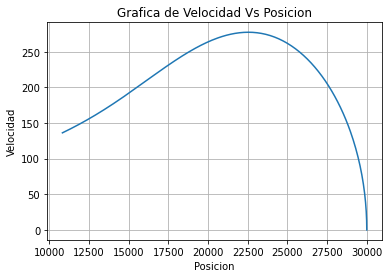

In [10]:
plt.plot(Ma[:,0], -Ma[:,1])
plt.grid()
plt.title('Grafica de Velocidad Vs Posicion')
plt.xlabel('Posicion')
plt.ylabel('Velocidad')

Para sacar su velocidad terminal, se hace la interpolación de los resultados de velocidad y tiempo para derivarlos. Una vez se tiene la aceleración, se debe ver cuándo esta da igual a cero.

In [11]:
def vl(U, t):
    df = pd.DataFrame({'Velocidad' : -I(U, t)[:,1], 'Tiempo' : t})
    coeffs = np.polyfit(df.Tiempo, df.Velocidad, 7)
    V = np.poly1d(coeffs)
    a = V.deriv()
    t_vlim = optimize.newton(a, 60)
    return V(t_vlim)

Text(0.5, 0, 'Altura inicial')

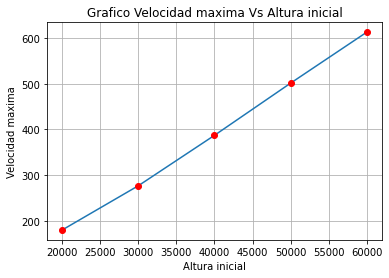

In [13]:
Alt = np.arange(20000, 70000, 10000)
L=[]
for i in Alt:
    Ua = [i,0]
    L.append(vl([i,0], T))

plt.plot(Alt, L)
plt.plot(Alt, L, 'ro')
plt.grid()
plt.title('Grafico Velocidad maxima Vs Altura inicial')
plt.ylabel('Velocidad maxima')
plt.xlabel('Altura inicial')